MODULE: DATA ANALYTICS

*ASSIGNMENT 2*

**TOPIC: DATA EXPLORATION and Visualization**

For the given *Earthquake* Dataset

#1. Clean and perform steps of Wrangling.


In [67]:
import pandas as pd

In [68]:
df = pd.read_csv('/content/earthquake.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

Since in Columns : Depth Error, Depth Seismic Stations, Magnitude Error, Magnitude Seismic Stations, Azimuthal Gap, Horizontal Distance, and Horizontal Error has mostly the null values. Dropping these columns from dataframe is sensible thing to do.

In [69]:
df1 = df.drop(columns=['Depth Error', 'Depth Seismic Stations', 'Magnitude Error', 'Magnitude Seismic Stations', 'Azimuthal Gap', 'Horizontal Distance', 'Horizontal Error'])
df1.head(2)

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,02/01/1965,13:44:18,19.246,145.616,Earthquake,131.6,6.0,MW,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,04/01/1965,11:29:49,1.863,127.352,Earthquake,80.0,5.8,MW,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic


In [70]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              23412 non-null  object 
 1   Time              23412 non-null  object 
 2   Latitude          23412 non-null  float64
 3   Longitude         23412 non-null  float64
 4   Type              23412 non-null  object 
 5   Depth             23412 non-null  float64
 6   Magnitude         23412 non-null  float64
 7   Magnitude Type    23409 non-null  object 
 8   Root Mean Square  17352 non-null  float64
 9   ID                23412 non-null  object 
 10  Source            23412 non-null  object 
 11  Location Source   23412 non-null  object 
 12  Magnitude Source  23412 non-null  object 
 13  Status            23412 non-null  object 
dtypes: float64(5), object(9)
memory usage: 2.5+ MB


For columns Magnitude Type, and Root Mean Square has some null values.

**Imputation:**
 'Magnitude Type' has object as dtype so frequent value is better method for imputing for null values. OTOH RMS is continuous and dtype float using mean is better method.

In [71]:
df1[df1['Magnitude Type'].isnull()]

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
6703,08/24/1983,13:36:00,40.3732,-124.9227,Earthquake,11.93,5.70,NaN,NaN,ATLAS19830824133600,ATLAS,ATLAS,ATLAS,Automatic
7294,11/23/1984,18:08:00,37.4600,-118.5900,Earthquake,9.00,5.82,NaN,NaN,ATLAS19841123180800,ATLAS,ATLAS,ATLAS,Automatic
7919,03/31/1986,11:55:00,37.4788,-121.6858,Earthquake,9.17,5.60,NaN,NaN,ATLAS19860331115500,ATLAS,ATLAS,ATLAS,Automatic


In [72]:
freqMT = df1['Magnitude Type'].value_counts().idxmax()
freqMT

'MW'

In [73]:
avgrms = df1['Root Mean Square'].sum()/ df1['Root Mean Square'].notnull().sum()
avgrms

1.022783990318119

In [74]:
import numpy as np
df1['Magnitude Type'].replace(np.nan, freqMT, inplace=True)
df1['Root Mean Square'].replace(np.nan, avgrms, inplace=True)
df1.head(10)

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,02/01/1965,13:44:18,19.246,145.616,Earthquake,131.6,6.0,MW,1.022784,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,04/01/1965,11:29:49,1.863,127.352,Earthquake,80.0,5.8,MW,1.022784,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,05/01/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,6.2,MW,1.022784,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,08/01/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,5.8,MW,1.022784,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,09/01/1965,13:32:50,11.938,126.427,Earthquake,15.0,5.8,MW,1.022784,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
5,10/01/1965,13:36:32,-13.405,166.629,Earthquake,35.0,6.7,MW,1.022784,ISCGEM860922,ISCGEM,ISCGEM,ISCGEM,Automatic
6,12/01/1965,13:32:25,27.357,87.867,Earthquake,20.0,5.9,MW,1.022784,ISCGEM861007,ISCGEM,ISCGEM,ISCGEM,Automatic
7,01/15/1965,23:17:42,-13.309,166.212,Earthquake,35.0,6.0,MW,1.022784,ISCGEM861111,ISCGEM,ISCGEM,ISCGEM,Automatic
8,01/16/1965,11:32:37,-56.452,-27.043,Earthquake,95.0,6.0,MW,1.022784,ISCGEMSUP861125,ISCGEMSUP,ISCGEM,ISCGEM,Automatic
9,01/17/1965,10:43:17,-24.563,178.487,Earthquake,565.0,5.8,MW,1.022784,ISCGEM861148,ISCGEM,ISCGEM,ISCGEM,Automatic


In [75]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              23412 non-null  object 
 1   Time              23412 non-null  object 
 2   Latitude          23412 non-null  float64
 3   Longitude         23412 non-null  float64
 4   Type              23412 non-null  object 
 5   Depth             23412 non-null  float64
 6   Magnitude         23412 non-null  float64
 7   Magnitude Type    23412 non-null  object 
 8   Root Mean Square  23412 non-null  float64
 9   ID                23412 non-null  object 
 10  Source            23412 non-null  object 
 11  Location Source   23412 non-null  object 
 12  Magnitude Source  23412 non-null  object 
 13  Status            23412 non-null  object 
dtypes: float64(5), object(9)
memory usage: 2.5+ MB


#2. Depict the shape w.r.t skewness in magnitude and visualize its
#correlation with various attributes of data.


In [76]:
import matplotlib.pyplot as plt
import scipy.stats as stats

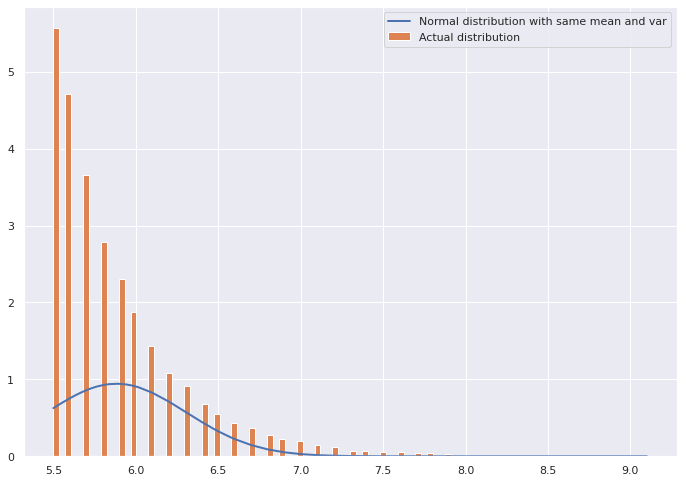

In [77]:
#convert pandas DataFrame object to numpy array and sort
h = np.asarray(df1['Magnitude'])
h = sorted(h)
 
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(h, np.mean(h), np.std(h)) 
 
#plot both series on the histogram
plt.plot(h,fit,'-',linewidth = 2,label="Normal distribution with same mean and var")
plt.hist(h,density=True,bins = 100,label="Actual distribution")      
plt.legend()
plt.show()

In [78]:
import seaborn as sns

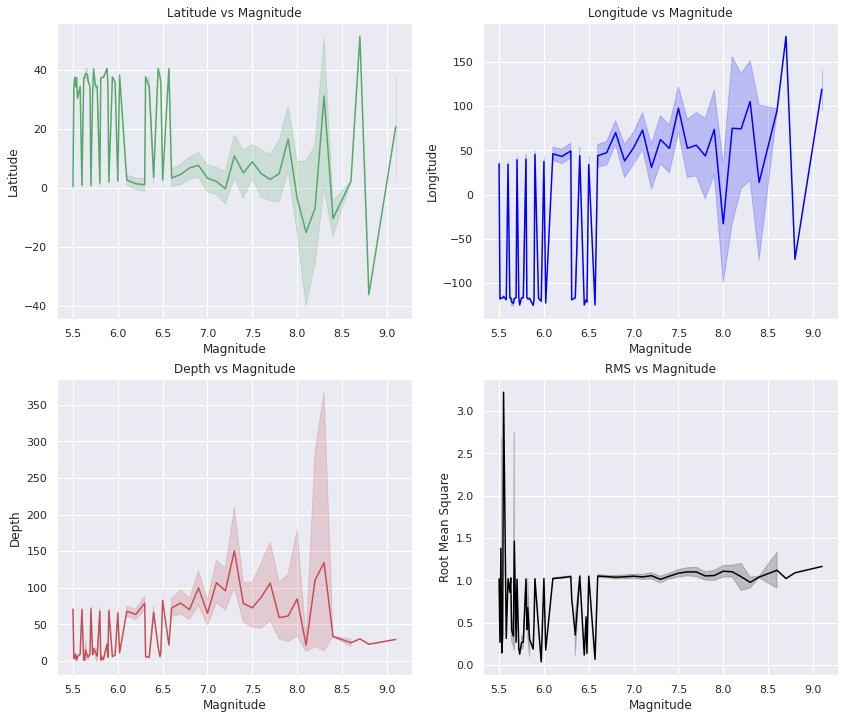

In [79]:
cpl = ['Latitude','Longitude','Depth','Magnitude','Root Mean Square']

fig = plt.figure(figsize=(14,12))

# #  subplot #1
plt.subplot(221)
plt.title('Latitude vs Magnitude')
sns.lineplot(data = df1,y='Latitude',x='Magnitude',color='g')

#  subplot #2
plt.subplot(2,2,2)
plt.title('Longitude vs Magnitude')
sns.lineplot(data = df1,y='Longitude',x='Magnitude',color='blue')

#  subplot #3
plt.subplot(223)
plt.title('Depth vs Magnitude')
sns.lineplot(data = df1, y=df1['Depth'],x=df1['Magnitude'],color='r')

#  subplot #4
plt.subplot(2,2,4)
plt.title('RMS vs Magnitude')
sns.lineplot(data = df1, y=df1['Root Mean Square'],x=df1['Magnitude'],color='black')


plt.show()

#3. Explore the correlation statistics.

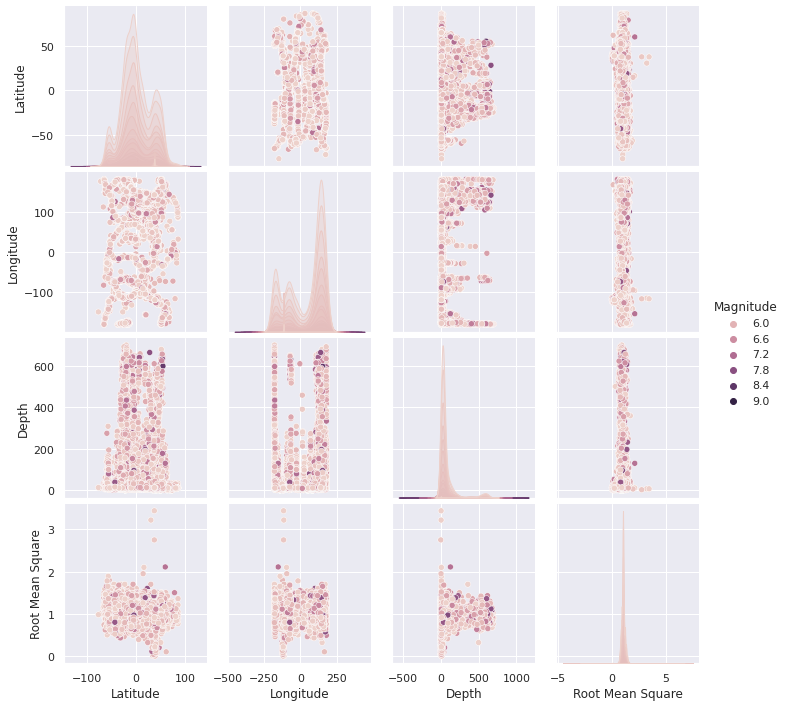

In [80]:
sns.pairplot(df1, hue='Magnitude')


#4. At which point of hour the most of the earthquakes and
#visualize the same using line plot w.r.t hour attribute.



In [81]:
df1 = df1.drop(df.index[df['Time'] == '1975-02-23T02:58:41.000Z'])
df1 = df1.drop(df.index[df['Time'] == '1985-04-28T02:53:41.530Z'])
df1 = df1.drop(df.index[df['Time'] == '2011-03-13T02:23:34.520Z'])
df1['Time']=(pd.to_datetime(df1['Time'].str.strip(), format='%H:%M:%S'))
df1['Hour']= df1['Time'].dt.hour

In [82]:
hour_counts = df1.groupby('Hour').apply(lambda x: x['Hour'].values)
hour_counts = pd.DataFrame(hour_counts)

In [83]:
df1.groupby('Hour').size()

Hour
0      948
1      954
2      974
3     1029
4      975
5      996
6      998
7     1005
8      978
9      930
10    1017
11     981
12     946
13    1058
14     981
15     926
16     917
17     998
18    1029
19     996
20     939
21     945
22     923
23     966
dtype: int64

# 13th Hour has most number of EarthQuakes!



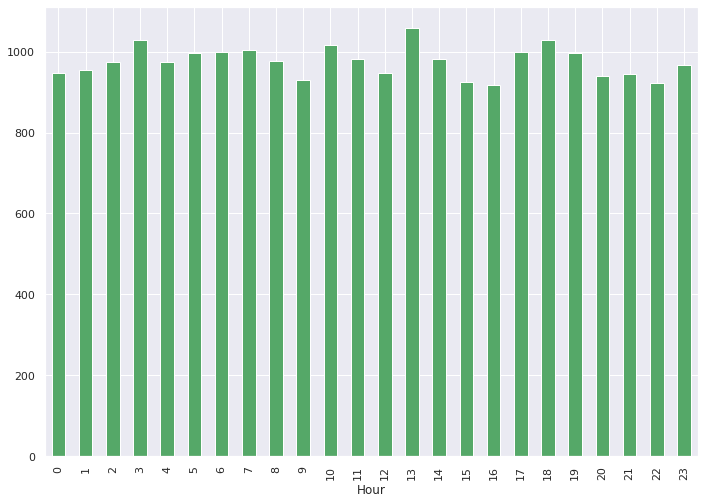

In [84]:
df1.groupby('Hour').size().plot(kind='bar',color='g')

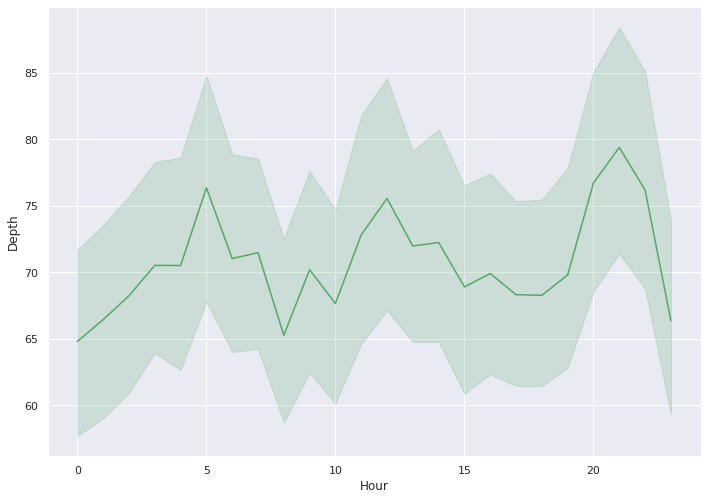

In [85]:
#WRT Depth
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(x='Hour',y='Depth',data=df1, color='g')

In [86]:
# df1.groupby(['Hour']).count()

In [87]:
df1.head(2)

,Date,Time,Latitude,Longitude,Type,Depth,Magnitude,Magnitude Type,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,Hour
0,02/01/1965,1900-01-01 13:44:18,19.246,145.616,Earthquake,131.6,6.0,MW,1.022784,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,13
1,04/01/1965,1900-01-01 11:29:49,1.863,127.352,Earthquake,80.0,5.8,MW,1.022784,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,11


#**5**. Visualize the count w.r.t Source, Type and Magnitude Source.

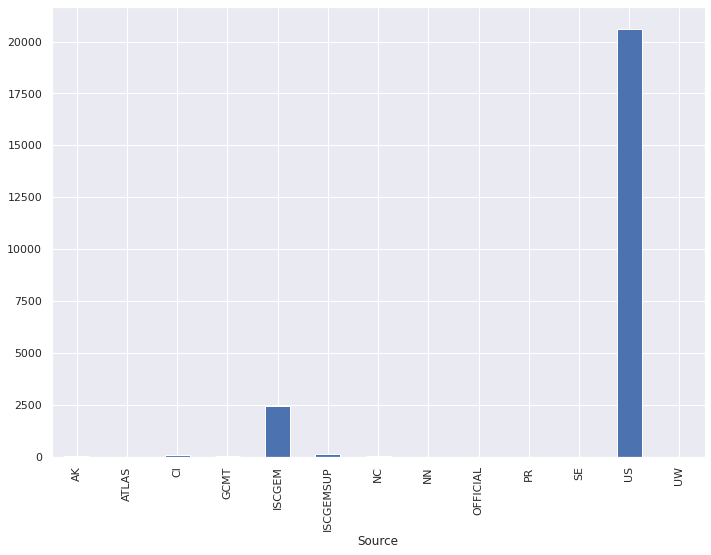

In [88]:
df1.groupby('Source').size().plot(kind='bar',color='b')


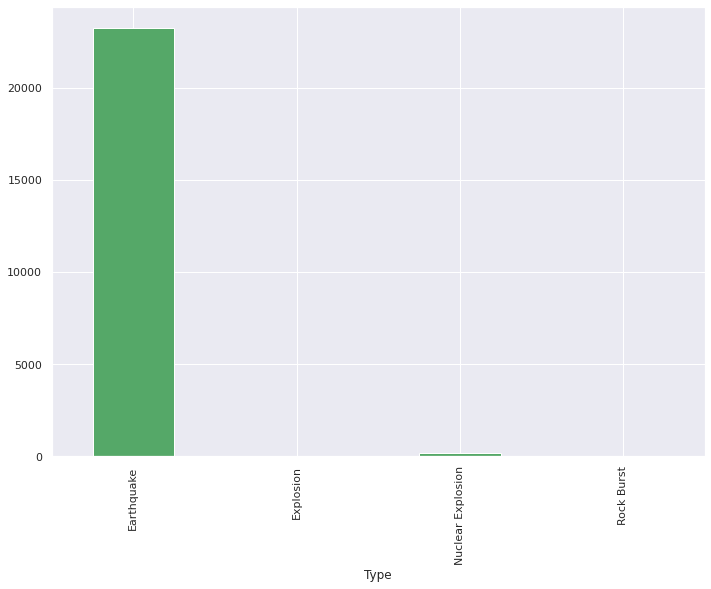

In [89]:
df1.groupby('Type').size().plot(kind='bar',color='g')


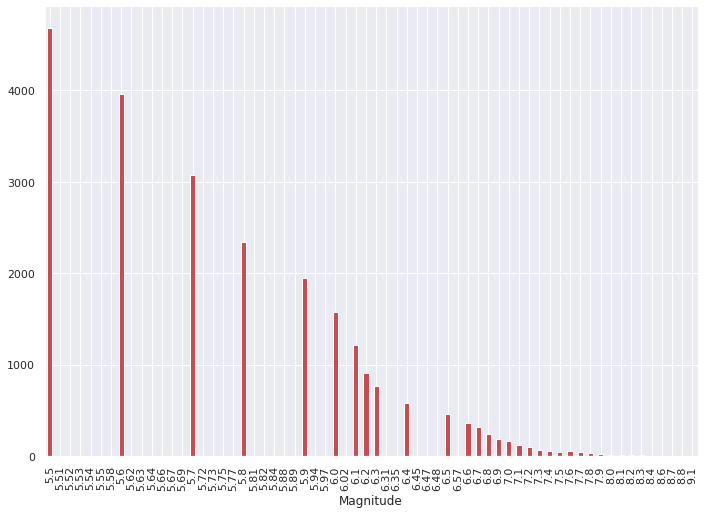

In [90]:
df1.groupby('Magnitude').size().plot(kind='bar',color='r')
